<a href="https://colab.research.google.com/github/ADRIAN02-CODE/telco-churn-prediction/blob/main/telco_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction in Telco

Churn prediction of customers with the Telco Customer Churn dataset Decision Tree and Neural Network models. Is comprised of data preprocessing, exploration, training, tuning and evaluation.

---





## 1. Libraries

Data analysis, visualization and modeling

In [1]:

import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np     # Numerical computing and data handling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV  #we use these for visualization
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import joblib
import json


import tensorflow as tf #these are used in deep learing stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


from imblearn.over_sampling import SMOTE  ## this will handle class imbalance


RANDOM_STATE = 42
TEST_SIZE = 0.2
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

print("Libraries set up correctly.")


Libraries set up correctly.


## Task 1: Exploratory Data Analysis (EDA)

Here we will be able to investigate the dataset to learn the distributions of features, their relationships and what can be used to guide modeling


In [2]:
DATA_FILENAME = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(DATA_FILENAME)
print("Loaded dataset:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include="all").T)


Loaded dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Cleaning

- Strip whitespace in string columns  
- Convert `TotalCharges` to numeric and impute missing values  
- Drop the `customerID` column


In [3]:

for col in df.select_dtypes(include="object").columns: #this will avoid the duplicates
    df[col] = df[col].astype(str).str.strip()

# this will Convert Total Charges to numeric and impute missing
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

print(df.isna().sum())  #this will check remaining missing values
display(df.head())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Target Variable Distribution
Visualize churn distribution to check class imbalance.



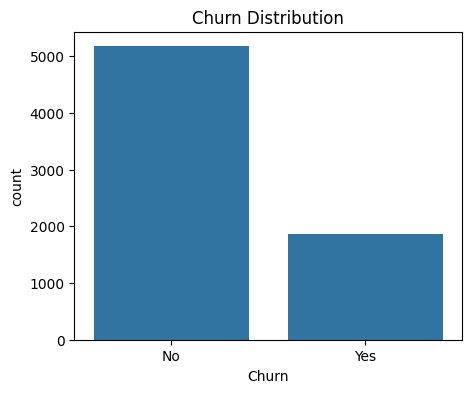

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [4]:
# if the dataset is imbalanced between churners and non‑churners it will plot churn distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

print(df["Churn"].value_counts(normalize=True))


### Numeric Feature Distributions
Visualize distributions of `tenure`, `MonthlyCharges`, and `TotalCharges`.



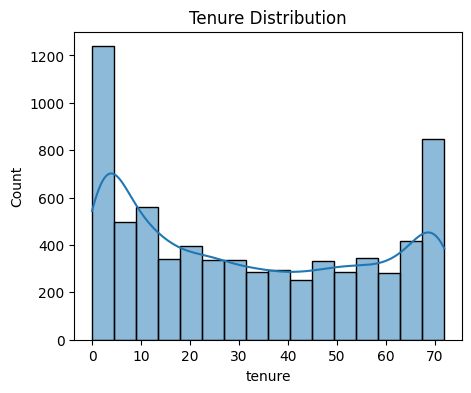

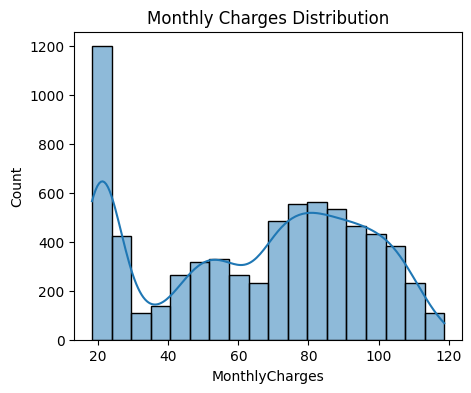

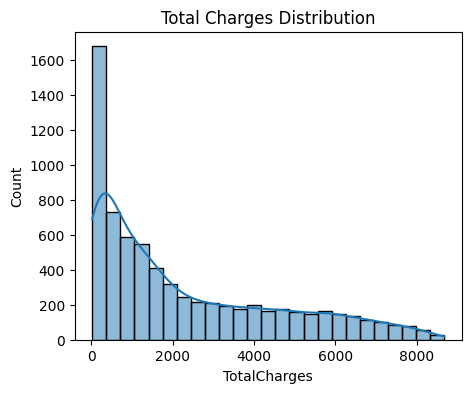

In [5]:
# this boxplots compare charges and tenure across churn vs non‑churn groups to see differences in medians and spread
plt.figure(figsize=(5,4))
sns.histplot(df["tenure"], kde=True)
plt.title("Tenure Distribution")
plt.show()

plt.figure(figsize=(5,4))
sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()

plt.figure(figsize=(5,4))
sns.histplot(df["TotalCharges"], kde=True)
plt.title("Total Charges Distribution")
plt.show()


### Feature Relationships with Churn
- Boxplots for numeric features  
- Countplots for categorical features  
- Correlation heatmap



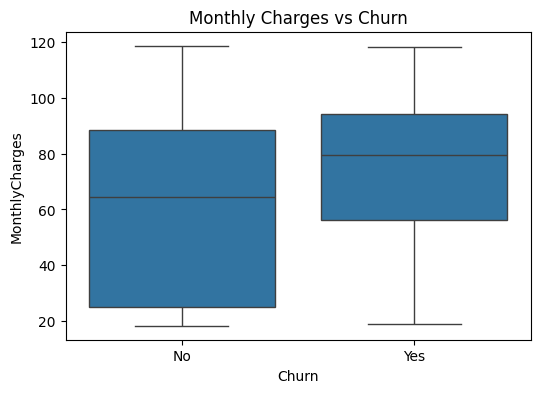

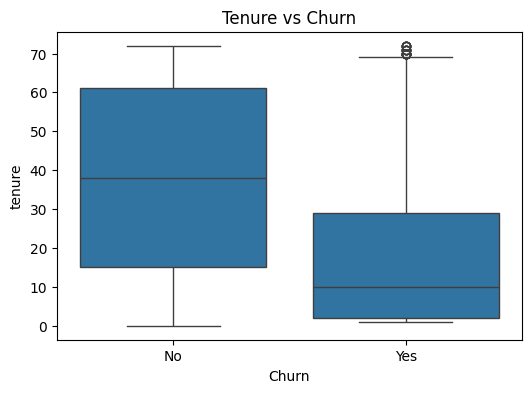

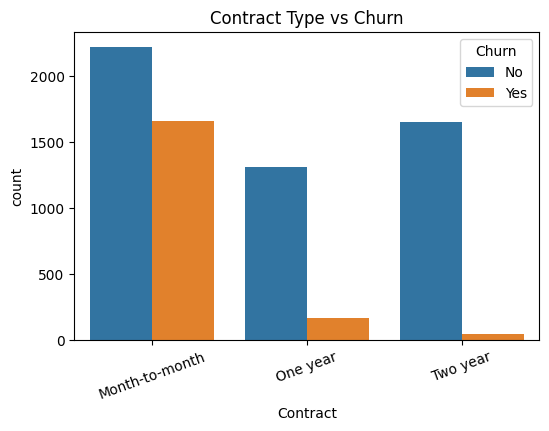

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=20)
plt.show()


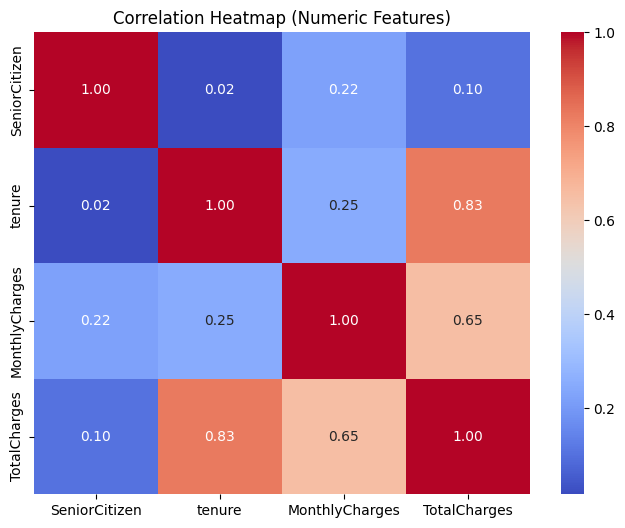

In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns # this will tell the correlation between numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


## Task 2: Classification Modeling

In this task, we implement **Decision Tree** and **Neural Network** models to predict churn.  
The workflow includes:
- Data preprocessing  
- Hyperparameter tuning  
- Model training  
- Evaluation and comparison


In [8]:
# Encode target
df["Churn"] = df["Churn"].map({"Yes":1, "No":0}).astype(int)

# One-hot encode categorical predictors
X = pd.get_dummies(df.drop(columns=["Churn"]), drop_first=True)
y = df["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# SMOTE oversampling on train
sm = SMOTE(random_state=RANDOM_STATE)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Scaling for NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "scaler.pkl")
print("Train resampled:", X_train_res.shape, "Test:", X_test.shape)


Train resampled: (8278, 30) Test: (1409, 30)


### 2.1 Decision Tree Model

- Hyperparameter tuning with `GridSearchCV`  
- Evaluate using accuracy, ROC-AUC, confusion matrix, classification report  
- Plot ROC curve



In [18]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

# the hyperparameter grid to control tree complexity and splitting behavior
param_grid_dt = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid_dt = GridSearchCV(
    dt,
    param_grid_dt,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train_res, y_train_res) # this will train the tuned Decision Tree on the resampled training data

best_dt = grid_dt.best_estimator_ ## this will extract and save the best tree model
joblib.dump(best_dt, "best_dt.pkl")

print("Best DT params:", grid_dt.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best DT params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}


DT Accuracy: 0.7501774308019872
DT AUC: 0.8103257640342039

DT Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1035
           1       0.52      0.65      0.58       374

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409


DT Confusion Matrix:
 [[814 221]
 [131 243]]


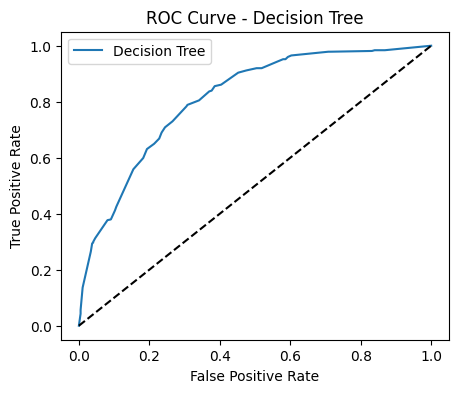

In [10]:
y_pred_dt = best_dt.predict(X_test) #this will predict churn labels and probabilities on the untouched test set
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

print("DT Accuracy:", accuracy_score(y_test, y_pred_dt))
print("DT AUC:", roc_auc_score(y_test, y_proba_dt))
print("\nDT Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nDT Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(5,4)) #this will plot the ROC curve
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


### 2.2 Neural Network Model

- Build a feedforward neural network using Keras  
- Use dropout for regularization  
- Train and evaluate the model


In [11]:
input_dim = X_train_scaled.shape[1]

def build_nn(n_hidden=32, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Dense(n_hidden, activation="relu", input_shape=(input_dim,)), #First hidden layer
        Dropout(dropout_rate),   #Dropout to prevent overfitting
        Dense(max(8, n_hidden // 2), activation="relu"), # Second hidden layer
        Dense(1, activation="sigmoid")  # Output layer
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [12]:
#i Builded a and train NN without SciKeras

input_dim = X_train_scaled.shape[1]

def build_nn(n_hidden=64, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Dense(n_hidden, activation="relu", input_shape=(input_dim,)),
        Dropout(dropout_rate),
        Dense(max(8, n_hidden // 2), activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Builded a NN with chosen hyperparameters
best_nn = build_nn(
    n_hidden=64,
    dropout_rate=0.3,
    learning_rate=0.001
)

history = best_nn.fit(
    X_train_scaled, y_train_res,
    validation_split=0.2,
    epochs=40,
    batch_size=32,
    verbose=1
)

# this will Save model
best_nn.save("best_nn.h5")
joblib.dump(best_nn, "best_nn_sklearn.pkl")  # optional, just to mirror the DT saving


Epoch 1/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6501 - loss: 0.6204 - val_accuracy: 0.7742 - val_loss: 0.5143
Epoch 2/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7839 - loss: 0.4676 - val_accuracy: 0.8315 - val_loss: 0.4292
Epoch 3/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7847 - loss: 0.4517 - val_accuracy: 0.8551 - val_loss: 0.3843
Epoch 4/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4414 - val_accuracy: 0.8635 - val_loss: 0.3664
Epoch 5/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7984 - loss: 0.4341 - val_accuracy: 0.8690 - val_loss: 0.3525
Epoch 6/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8035 - loss: 0.4339 - val_accuracy: 0.8720 - val_loss: 0.3332
Epoch 7/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7986 - loss: 0.4292 - val_accuracy: 0.8726 - val_loss: 0.3255
Epoch 8/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8111 - loss: 0.4194 - val_accuracy: 0.

['best_nn_sklearn.pkl']

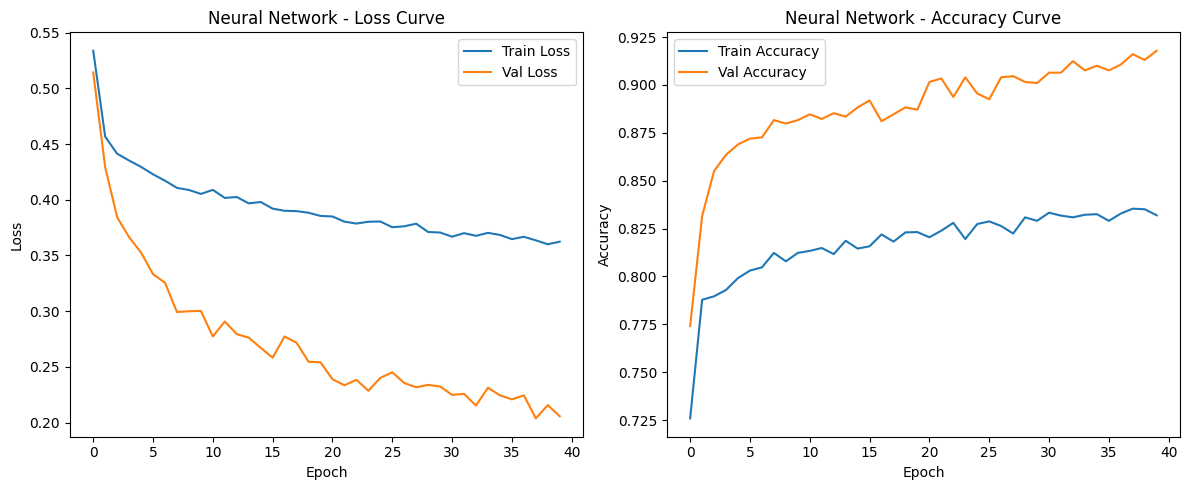

In [13]:


plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Neural Network - Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Neural Network - Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
NN Accuracy: 0.7828246983676366
NN AUC: 0.8342375158231936

NN Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.51      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409


NN Confusion Matrix:
 [[911 124]
 [182 192]]


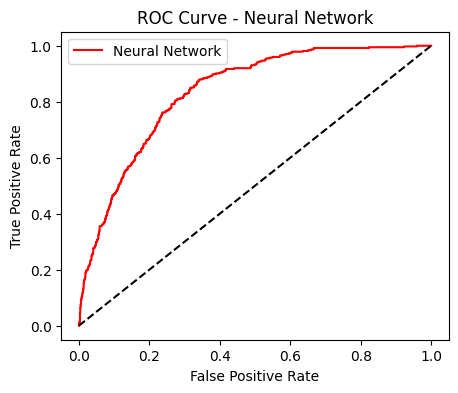

In [19]:


y_proba_nn = best_nn.predict(X_test_scaled).ravel()  #this will Predict churn probabilities and labels for test data
y_pred_nn = (y_proba_nn >= 0.5).astype(int)

print("NN Accuracy:", accuracy_score(y_test, y_pred_nn))
print("NN AUC:", roc_auc_score(y_test, y_proba_nn))
print("\nNN Classification Report:\n", classification_report(y_test, y_pred_nn))
print("\nNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)#this is the ROC points for NN

# this will plot ROC for NN
plt.figure(figsize=(5,4))
plt.plot(fpr_nn, tpr_nn, label="Neural Network", color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.show()




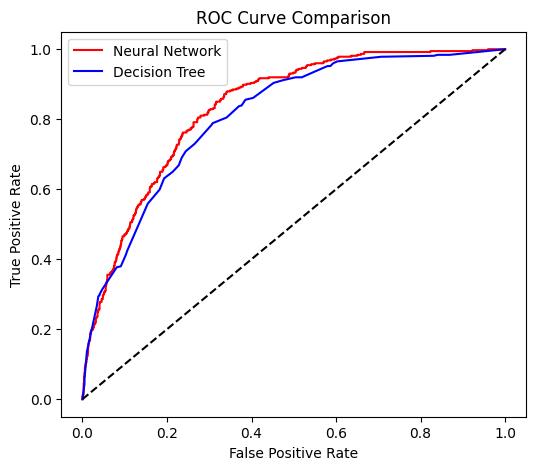

In [15]:
# Compute ROC for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)

# Compute ROC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

# Combined ROC plot
plt.figure(figsize=(6,5))
plt.plot(fpr_nn, tpr_nn, label="Neural Network", color='red')
plt.plot(fpr_dt, tpr_dt, label="Decision Tree", color='blue')
plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


### 2.3 Model Comparison

Compare Decision Tree vs Neural Network based on **Accuracy** and **ROC-AUC**.


In [16]:
from sklearn.metrics import precision_score, recall_score

summary = pd.DataFrame({
    "Model": ["Decision Tree (Tuned)", "Neural Network"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_nn)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_nn)
    ],
    "Churn Recall (Sensitivity)": [
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_nn)
    ],
    "Churn Precision": [
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_nn)
    ]
})

print("Performance Summary:")
display(summary)


Performance Summary:


,Model,Accuracy,ROC-AUC,Churn Recall (Sensitivity),Churn Precision
0,Decision Tree (Tuned),0.750177,0.810326,0.649733,0.523707
1,Neural Network,0.782825,0.834238,0.513369,0.607595
